In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as rcparams

In [5]:
dataset = pd.read_csv("passenger.csv")

In [6]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['Month'])

In [7]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


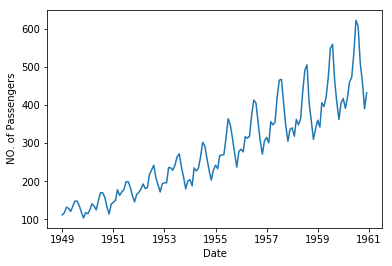

In [8]:
#plot graph
plt.xlabel("Date")
plt.ylabel(" NO. of Passengers")
plt.plot(indexedDataset)



In [9]:
# Determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

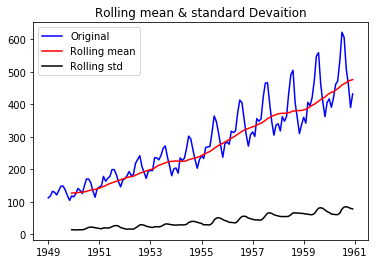

In [10]:
#plot rolling statistic:
orig = plt.plot(indexedDataset,color ='blue', label='Original')
mean = plt.plot(rolmean, color ='red', label = "Rolling mean")
std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling mean & standard Devaition')
plt.show(block=False)

In [11]:
# perform dicky-fuller test
from statsmodels.tsa.stattools import adfuller
print ('Results of Dicky-fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'])
autolag = 'AIC'

dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', '#lags used', 'number of observation uses'])
for key, value in dftest[4].items():
    dfoutput['critical value (%s)' %key]= value 
print(dfoutput)

Results of Dicky-fuller Test:
Test statistic                  0.815369
p-value                         0.991880
#lags used                     13.000000
number of observation uses    130.000000
critical value (1%)            -3.481682
critical value (5%)            -2.884042
critical value (10%)           -2.578770
dtype: float64


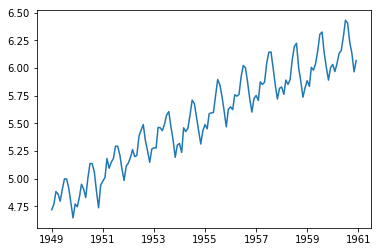

In [12]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

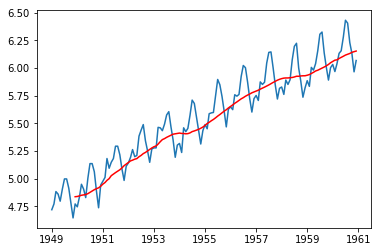

In [13]:
#Moving Average
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingStd = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [14]:
#Aquiring mean of 12 months
datasetLogScaleMinusMovingAverage = indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [15]:
#dropping NaN form all the data set
#we get mean on basis of year
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [16]:
#checking stationarity in data set
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):  
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #plot rolling statistic:
    orig = plt.plot(timeseries, color = 'blue', label = 'Original' )
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling mean')
    std = plt.plot(movingSTD, color = 'black', label= "Rolling std")
    plt.legend(loc='best')
    plt.legend('Rolling mean & standard deviation')
    plt.show(block=False)
    
    #perform dickey-fuller test:
    print('Results of Dickey-fuller test:')
    dftest = adfuller(timeseries['#Passengers'], autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test statistic','p-value','#lags used', 'number of observations used'])
    for key, value in dftest[4].items():
        dfoutput['critical value (%s)'%key] =value
    print(dfoutput)

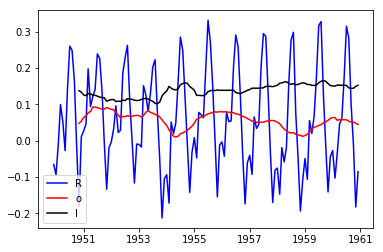

Results of Dickey-fuller test:
Test statistic                  -3.162908
p-value                          0.022235
#lags used                      13.000000
number of observations used    119.000000
critical value (1%)             -3.486535
critical value (5%)             -2.886151
critical value (10%)            -2.579896
dtype: float64


In [17]:
test_stationarity(datasetLogScaleMinusMovingAverage)

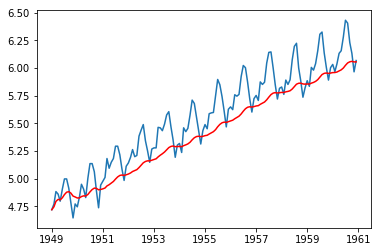

In [18]:
#Calculating weight and average to see trend
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife= 12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

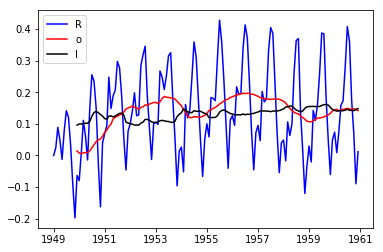

Results of Dickey-fuller test:
Test statistic                  -3.601262
p-value                          0.005737
#lags used                      13.000000
number of observations used    130.000000
critical value (1%)             -3.481682
critical value (5%)             -2.884042
critical value (10%)            -2.578770
dtype: float64


In [19]:
# using weighted mean to check stationarity
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

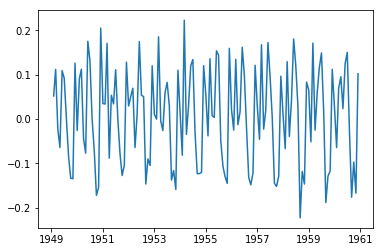

In [20]:
#shifting values in time series to use in forecasting 
datasetLogDiffshifting =indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffshifting)
#here we have taken lag or we can say that we have shifted the value by one

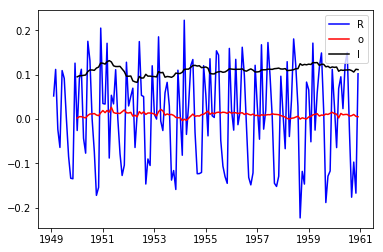

Results of Dickey-fuller test:
Test statistic                  -2.717131
p-value                          0.071121
#lags used                      14.000000
number of observations used    128.000000
critical value (1%)             -3.482501
critical value (5%)             -2.884398
critical value (10%)            -2.578960
dtype: float64


In [21]:
#dropping NaN values
datasetLogDiffshifting.dropna(inplace=True)
test_stationarity(datasetLogDiffshifting)
#here we can see we have got a flat output and we can see that null hypothesis is rejected and we can say that the time series is stationary

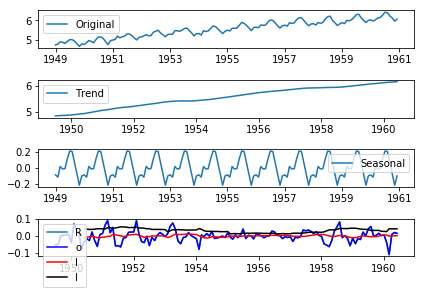

Results of Dickey-fuller test:
Test statistic                -6.332387e+00
p-value                        2.885059e-08
#lags used                     9.000000e+00
number of observations used    1.220000e+02
critical value (1%)           -3.485122e+00
critical value (5%)           -2.885538e+00
critical value (10%)          -2.579569e+00
dtype: float64


In [22]:
#component of time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label= 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label= 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace =True)
test_stationarity(decomposedLogData)

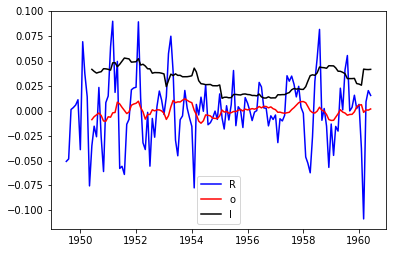

Results of Dickey-fuller test:
Test statistic                -6.332387e+00
p-value                        2.885059e-08
#lags used                     9.000000e+00
number of observations used    1.220000e+02
critical value (1%)           -3.485122e+00
critical value (5%)           -2.885538e+00
critical value (10%)          -2.579569e+00
dtype: float64


In [23]:
#checking noise stationarity
decomposedLogData= residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

#now we know the value of d we have to know value of p and q ie AR and MA model
#ACF = p and PACF = q


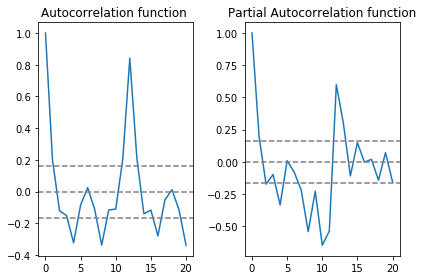

In [24]:
#ACFand PACF plots:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffshifting, nlags = 20)
lag_pacf =pacf(datasetLogDiffshifting, nlags = 20, method = 'ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y= -1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle ='--', color ='gray')
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle = '--', color ='gray')
plt.title('Autocorrelation function ')


#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y= -1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle = '--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle= '--', color = 'gray')
plt.title("Partial Autocorrelation function")
plt.tight_layout()

'''To calculate p and q value we have to see where the graph cuts or drops to zero for the first time.
In the above graph we can see that the value of auto correlation function drops to 0 at the point 2 (vertically)
and for the partial autocorelation function it is also the same so this is how value of p and q is calculated.'''



#Now we have the value of p,q and d now we can substitute it to arima model

/home/bibek/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bibek/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


NameError: name 'results_AR' is not defined

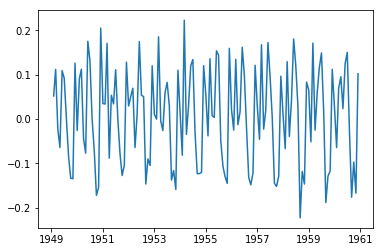

In [25]:
# Arima model implementation 
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(indexedDataset_logScale, order = (2,1,2))
results_ARIMA =model.fit(display = 1)
plt.plot(datasetLogDiffshifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues- datasetLogDiffshifting['#Passengers'])**2))
print('Plotting AR model')

In [ ]:
# using it for MA
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_MA = model.fit(disp=1)
plt.plot(datasetLogDiffshifting)
plt.plot(results_MA.fittedvalues, color ='red')
plt.title('RSS:%4f'%sum((results_MA.fittedvalues-datasetLogDiffshifting['#Passengers'])**2))
print('plotting AR Model')

In [ ]:
#Prediction ARIMA
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

In [ ]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
#predictions for fittes values
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value =0)
predictions_ARIMA_log.head()


In [ ]:
#real data vs how arima model has predicted
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [ ]:
#To see rows in data set
indexedDataset

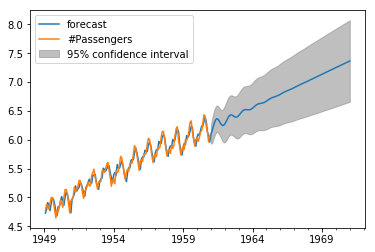

In [26]:
#now predictiong data for 10 years(12*10=120) & 144*120 = 1,264
results_ARIMA.plot_predict(1,264)
x= results_ARIMA.forecast(steps =120)